In [14]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
#upload file
df=pd.read_csv("Downloads/Wine.csv")

In [16]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [17]:

# Step 3: Separate Features (X) and Target (y)
X = df.drop('Customer_Segment', axis=1)
y = df['Customer_Segment']

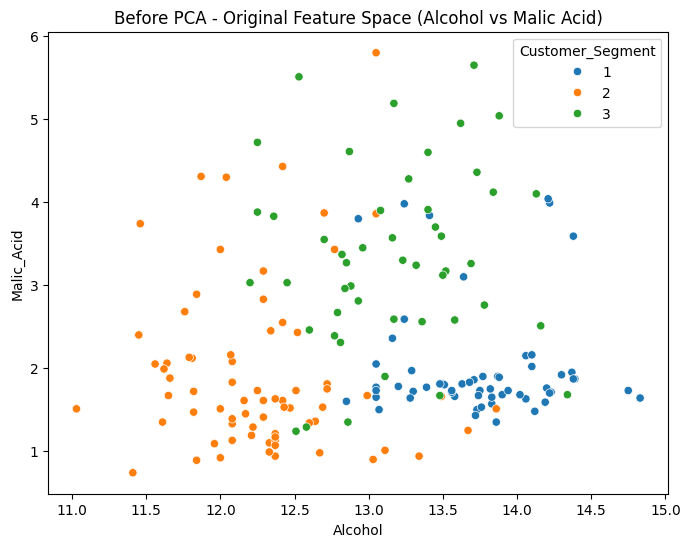

In [18]:
# Step 4: Visualize Data Before Applying PCA
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Alcohol', 
    y='Malic_Acid', 
    hue='Customer_Segment', 
    data=df, 
    palette='tab10'
)
plt.title("Before PCA - Original Feature Space (Alcohol vs Malic Acid)")
plt.show()

In [19]:
# Step 5: Standardize the Data (Important Step)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Step 6: Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [21]:
# Step 7: Create a New DataFrame for PCA Components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Target'] = y

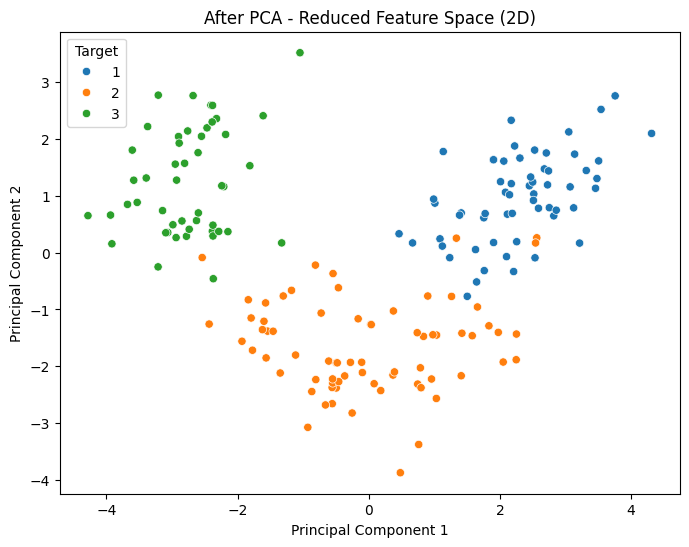

In [22]:
# Step 8: Visualize Data After Applying PCA
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Target', 
    data=pca_df, 
    palette='tab10'
)
plt.title("After PCA - Reduced Feature Space (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()